# **Aplicación Práctica**

Para consolidar tus conocimientos, realiza la siguiente actividad práctica:
1. Cargar y Limpiar el Dataset: Utiliza un dataset de Kaggle relacionado con ventas, salud o cualquier otro tema de interés.
2. Calcular las Correlaciones: Calcula las correlaciones de Pearson, Spearman y Kendall entre las variables del dataset.
3. Crear Mapas de Calor: Crea mapas de calor para cada tipo de correlación y analiza las relaciones entre las variables.
4. Interpretar los Resultados: Escribe un breve informe sobre las correlaciones encontradas y cómo pueden influir en el análisis de datos y la toma de decisiones.


# **1. Cargar y Explorar los Datos:**
* Descarga el dataset y cárgalo en un DataFrame de Pandas.
* Realiza una exploración inicial de los datos para entender las variables disponibles.

**1.- Preparación del Entorno **

In [6]:
# Conectamos nuestro drive.
from google.colab import drive
# Este comando conecta colab con drive.
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Importaciones
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Importamos una bbdd en formato csv y lo guardamos en una variable.
path = "/content/drive/MyDrive/Bootcamp-CSDATOS/CORES/histogramas&boxplots/2015.csv"  #cambiar x url de la data
df = pd.read_csv(path)
# Generamos una copia para no modificar el original
df2= df.copy()

**2.- Inspeccionamos la data**

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [10]:
df2.head(5)  #para verificar la carga de la data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [11]:
df2.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [12]:
#Confirmando que no hay  datos faltantes x columnas
print("\nValores faltantes por columna:")
print(df2.isnull().sum())


Valores faltantes por columna:
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


In [13]:
df2.shape

(158, 12)

In [14]:
# Tipos de datos de las columnas
print(df2.dtypes)

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object


In [15]:
df2.head(5)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [16]:
# Usamos lower y replace para limpiar--> Cambio de nombres en columnas: Buena Práctica
df2.columns = df2.columns.str.lower().str.replace(" ", "_")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        158 non-null    object 
 1   region                         158 non-null    object 
 2   happiness_rank                 158 non-null    int64  
 3   happiness_score                158 non-null    float64
 4   standard_error                 158 non-null    float64
 5   economy_(gdp_per_capita)       158 non-null    float64
 6   family                         158 non-null    float64
 7   health_(life_expectancy)       158 non-null    float64
 8   freedom                        158 non-null    float64
 9   trust_(government_corruption)  158 non-null    float64
 10  generosity                     158 non-null    float64
 11  dystopia_residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [17]:
df2.tail(5)

,country,region,happiness_rank,happiness_score,standard_error,economy_(gdp_per_capita),family,health_(life_expectancy),freedom,trust_(government_corruption),generosity,dystopia_residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


# **Desarrollo Actividad Correlación**

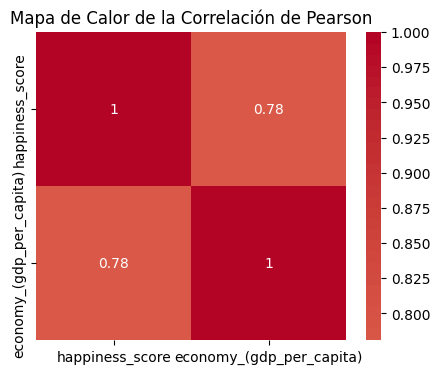

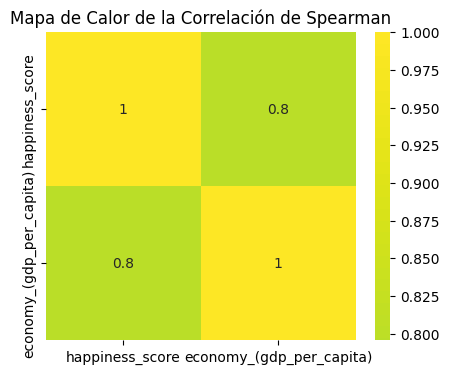

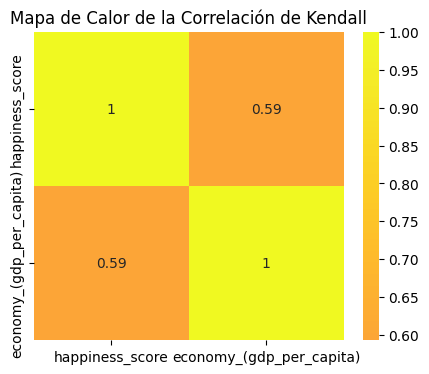

In [38]:
import seaborn as sns
# Cargar el dataset
dfc = df2[["happiness_score", "economy_(gdp_per_capita)"]]

# Calcular las correlaciones
correlation_matrix = dfc.corr(method='pearson')
spearman_corr = dfc.corr(method='spearman')
kendall_corr = dfc.corr(method='kendall')

# Crear mapas de calor
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

plt.figure(figsize=(5, 4))
sns.heatmap(spearman_corr, annot=True, cmap='viridis', center=0)
plt.title("Mapa de Calor de la Correlación de Spearman")
plt.show()

plt.figure(figsize=(5, 4))
sns.heatmap(kendall_corr, annot=True, cmap='plasma', center=0)
plt.title("Mapa de Calor de la Correlación de Kendall")
plt.show()



**Objetivo:**
Explorar la relación entre el puntaje de felicidad de los países y su nivel económico (PIB per cápita), utilizando tres métodos de correlación: Pearson, Spearman y Kendall. Esta información permite comprender qué tan fuertemente se asocian ambas variables y cómo podrían influir en decisiones relacionadas con políticas públicas o desarrollo humano.



**Correlación de Pearson:** Indica una fuerte relación lineal positiva entre el PIB per cápita y el puntaje de felicidad. A medida que aumenta la riqueza económica, también lo hace la percepción de bienestar general.

**Correlación de Spearman:** Confirma que existe una fuerte asociación en los rangos de ambas variables. Es decir, los países más ricos tienden a ocupar también los primeros lugares en el ranking de felicidad.

**Correlación de Kendall:** Aunque ligeramente más baja, sigue mostrando una alta concordancia en el orden de los países, lo cual respalda la robustez del análisis.